conda env=/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/ipykernel_launcher.py:76: RuntimeWarning: Mean of empty slice
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/ipykernel_launcher.py:78: RuntimeWarning: Mean of empty slice


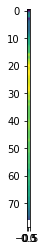

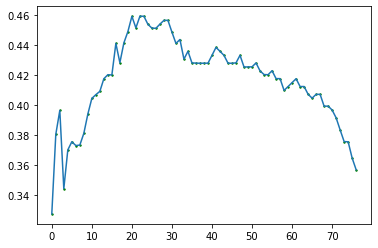

In [2]:
# find /gpfs/milgram/scratch60/turk-browne/kp578 -name "tmp__folder_2021-06-22-08-00-09"
# /gpfs/milgram/scratch60/turk-browne/kp578/06282021/tmp__folder_2021-06-22-08-00-09
tmp_folder="/gpfs/milgram/scratch60/turk-browne/kp578/06282021/tmp__folder_2021-06-22-08-00-09"
toml="sub004.ses1.toml"

import os
import sys
sys.path.append('/gpfs/milgram/project/turk-browne/projects/rt-cloud/')
sys.path.append('/gpfs/milgram/project/turk-browne/projects/rt-cloud/projects/rtSynth_rt/')
import argparse
import numpy as np
import nibabel as nib
import scipy.io as sio
import subprocess
from scipy.stats import zscore
from nibabel.nicom import dicomreaders
import pydicom as dicom  # type: ignore
import time
from glob import glob
import shutil
from nilearn.image import new_img_like
import joblib
import rtCommon.utils as utils
from rtCommon.utils import loadConfigFile
import pickle5 as pickle
def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

argParser = argparse.ArgumentParser()
argParser.add_argument('--config', '-c', default=toml, type=str, help='experiment file (.json or .toml)')
argParser.add_argument('--skipPre', '-s', default=False, action='store_true', help='skip preprocess or not')
argParser.add_argument('--skipGreedy', '-g', default=0, type=int, help='skip greedy or not')
argParser.add_argument('--forceGreedy', default='_', type=str, help='whether to force Greedy search in current session, can be compare_forceGreedy , forceGreedy or _')
argParser.add_argument('--testRun', '-t', default=None, type=int, help='testRun, can be [None,1,2,3,4,5,6,7,8]')
argParser.add_argument('--scan_asTemplate', '-a', default=1, type=int, help="which scan's middle dicom as Template?")
argParser.add_argument('--preprocessOnly', default=0, type=int, help='whether to only do preprocess and skip everything else')
argParser.add_argument('--tmp_folder', default='' , type=str, help='tmp_folder')

args = argParser.parse_args("")
from cfg_loading import mkdir,cfg_loading
cfg = cfg_loading(args.config)

# when every mask has run, find the best mask and save as the chosenMask
roiloc="schaefer2018"
dataSource="realtime"
subjects=[cfg.subjectName]
N=78
GreedyBestAcc=np.zeros((len(subjects),N+1))
GreedyBestAcc[GreedyBestAcc==0]=None
for ii,subject in enumerate(subjects):
    for len_topN_1 in range(N-1,0,-1):
        try:
            di = load_obj(f"{tmp_folder}/{subject}_{N}_{roiloc}_{dataSource}_{len_topN_1}")
            GreedyBestAcc[ii,len_topN_1-1] = di['bestAcc']
        except:
            pass
GreedyBestAcc=GreedyBestAcc.T

import matplotlib.pyplot as plt
plt.imshow(GreedyBestAcc)
_=plt.figure()
for i in range(GreedyBestAcc.shape[0]):
    plt.scatter([i]*GreedyBestAcc.shape[1],GreedyBestAcc[i],c='g',s=2)
plt.plot(np.arange(GreedyBestAcc.shape[0]),np.nanmean(GreedyBestAcc,axis=1))

performance_mean = np.nanmean(GreedyBestAcc,axis=1)




In [6]:
bestID=np.where(performance_mean==max(performance_mean))[0][0]
di = load_obj(f"{tmp_folder}/{subject}_{N}_{roiloc}_{dataSource}_{bestID+1}")
print(f"bestID={bestID}; best Acc = {di['bestAcc']}")
print(f"bestROIs={di['bestROIs']}")
def getMask(topN, cfg):
    for pn, parc in enumerate(topN):
        _mask = nib.load(f"{cfg.subjects_dir}{cfg.subjectName}/ses1/recognition/mask/GMschaefer_{parc}")
        # schaefer_56.nii.gz
        aff = _mask.affine
        _mask = _mask.get_data()
        _mask = _mask.astype(int)
        # say some things about the mask.
        mask = _mask if pn == 0 else mask + _mask
        mask[mask>0] = 1
    return mask
mask = getMask(di['bestROIs'],cfg)

bestID=23; best Acc = 0.45933067375886527
bestROIs=('234.nii.gz', '86.nii.gz', '163.nii.gz', '77.nii.gz', '76.nii.gz', '295.nii.gz', '166.nii.gz', '164.nii.gz', '259.nii.gz', '112.nii.gz', '58.nii.gz', '190.nii.gz', '93.nii.gz', '230.nii.gz', '265.nii.gz', '146.nii.gz', '205.nii.gz', '2.nii.gz', '204.nii.gz', '62.nii.gz', '281.nii.gz', '160.nii.gz', '246.nii.gz', '244.nii.gz')


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  # Remove the CWD from sys.path while we load stuff.


In [7]:
_mask=np.load(cfg.chosenMask)

In [12]:
np.sum((mask!=_mask)*1)

0